# Sujet 6 : Autour du Paradoxe de Simpson

## Taux de mortalité 

In [1]:
import pandas as pd

In [2]:
data_url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv"

In [3]:
df = pd.read_csv (data_url)
print(df.head())

  Smoker Status   Age
0    Yes  Alive  21.0
1    Yes  Alive  19.3
2     No   Dead  57.5
3     No  Alive  47.1
4    Yes  Alive  81.4


In [4]:
summary_table = df.groupby(['Smoker', 'Status']).size().unstack(fill_value=0)

summary_table['Total'] = summary_table.sum(axis=1)
summary_table['Mortality Rate'] = summary_table['Dead'] / summary_table['Total']

print(summary_table)


Status  Alive  Dead  Total  Mortality Rate
Smoker                                    
No        502   230    732        0.314208
Yes       443   139    582        0.238832


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

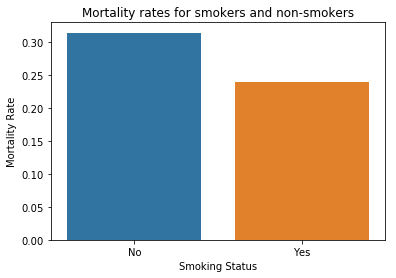

In [6]:
summary_table.reset_index(inplace=True)

sns.barplot(x='Smoker', y='Mortality Rate', data=summary_table)
plt.title('Mortality rates for smokers and non-smokers')
plt.ylabel('Mortality Rate')
plt.xlabel('Smoking Status')
plt.show()

Le graphique montre les taux de mortalité pour les fumeurs et les non-fumeurs. La mortalité semble être plus élevée chez les non-fumeurs que chez les fumeurs. Cela va à l'encontre de l'idée reçue que le tabagisme est généralement associé à un risque accru de mortalité. 

## Taux de mortalité par tranches d'âge

In [10]:

age_bins = [18, 34, 54, 64, 100]  
age_labels = ['18-34', '35-54', '55-64', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


age_smoking_table = df.groupby(['c', 'Smoker', 'Status']).size().unstack(fill_value=0)

age_smoking_table['Total'] = age_smoking_table.sum(axis=1)
age_smoking_table['Mortality Rate'] = age_smoking_table['Dead'] / age_smoking_table['Total']


print(age_smoking_table)


Status            Alive  Dead  Total  Mortality Rate
Age Group Smoker                                    
18-34     No        213     6    219        0.027397
          Yes       174     5    179        0.027933
35-54     No        180    19    199        0.095477
          Yes       198    41    239        0.171548
55-64     No         80    39    119        0.327731
          Yes        64    51    115        0.443478
65+       No         29   166    195        0.851282
          Yes         7    42     49        0.857143


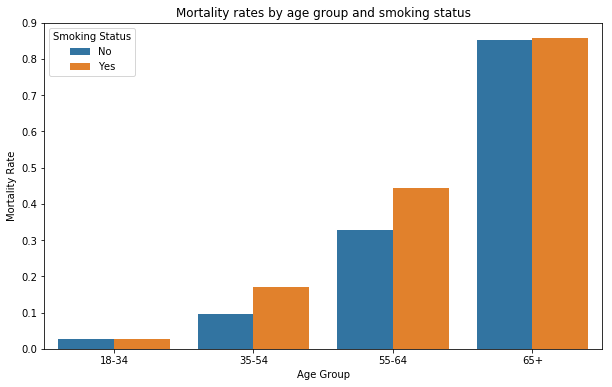

In [14]:
age_smoking_table.reset_index(inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Mortality Rate', hue='Smoker', data=age_smoking_table)
plt.title('Mortality rates by age group and smoking status')
plt.ylabel('Mortality Rate')
plt.xlabel('Age Group')
plt.legend(title='Smoking Status')
plt.show()

Ce graphique montre que les taux de mortalité augmentent avec l'âge, pour les fumeurs comme pour les non-fumeurs. Les fumeurs ont des taux de mortalité légèrement plus élevés dans les groupes d'âge intermédiaires (35-64 ans). Cependant, dans le groupe des 65 ans et plus, les taux de mortalité sont presque identiques pour les fumeurs et les non-fumeurs, ce qui peut s'expliquer par d'autres causes de décès. L'impact du tabagisme sur la mortalité semble plus marqué chez les personnes d'âge moyen, mais diminue chez les personnes âgée

## Régression logistique

In [15]:
import pandas as pd
import statsmodels.api as sm

url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv"
df = pd.read_csv(url)

df['Death'] = df['Status'].apply(lambda x: 1 if x == 'Dead' else 0)  
df['Smoking'] = df['Smoker'].apply(lambda x: 1 if x == 'Yes' else 0)  

X = sm.add_constant(df[['Age', 'Smoking']]) 
y = df['Death']  

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.381244
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Death   No. Observations:                 1314
Model:                          Logit   Df Residuals:                     1311
Method:                           MLE   Df Model:                            2
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                  0.3579
Time:                        09:18:51   Log-Likelihood:                -500.95
converged:                       True   LL-Null:                       -780.16
                                        LLR p-value:                5.534e-122
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3519      0.360    -17.637      0.000      -7.058      -5.646
Age            0.0998      0.